# ARBITRARY VALUE IMPUTATION

arbitrary value: It should not be most frequent value..eg: outlier

not commonly use

# CAPTURING NAN WITH A NEW FEATURE

It works well if the data are not missing completely at random

# RANDOM SAMPLE IMPUTATION

WHEN SHOULD WE APPLY IT?

It assumes that data are MCAR

similar to mean/median imputation
It consists of taking random observation fom the dataet and we use this observation to replace the nan values

# MEAN MODE MEDIAN IMPUTATION

WHEN SHOULD WE APPLY IT?

mean/median imputation has the assumption that the data are missing completey at random(MCAR)
solve this by replacing the most freuent occurance of the variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.decomposition import PCA

In [3]:
features = pd.read_csv("training_set_features.csv")
target = pd.read_csv("training_set_labels.csv")
testing = pd.read_csv("test_set_features.csv")

In [4]:
df = pd.concat([features,target],axis=1)

In [5]:
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,2,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,3,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,4,0,0


In [6]:
testing.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [7]:
df.drop(['respondent_id','employment_industry','employment_occupation'],axis=1,inplace=True)
testing.drop(['respondent_id','employment_industry','employment_occupation'],axis=1,inplace=True)

In [8]:
df.shape

(26707, 35)

In [9]:
for col in testing.columns:
    print(testing[col].value_counts())

2.0    10743
1.0     8158
3.0     4523
0.0     3199
Name: xyz_concern, dtype: int64
1.0    14629
2.0     9515
0.0     2442
Name: xyz_knowledge, dtype: int64
0.0    25307
1.0     1322
Name: behavioral_antiviral_meds, dtype: int64
1.0    19336
0.0     7159
Name: behavioral_avoidance, dtype: int64
0.0    24840
1.0     1849
Name: behavioral_face_mask, dtype: int64
1.0    22030
0.0     4638
Name: behavioral_wash_hands, dtype: int64
0.0    17273
1.0     9363
Name: behavioral_large_gatherings, dtype: int64
0.0    17647
1.0     8979
Name: behavioral_outside_home, dtype: int64
1.0    18174
0.0     8406
Name: behavioral_touch_face, dtype: int64
0.0    19082
1.0     5466
Name: doctor_recc_xyz, dtype: int64
0.0    16360
1.0     8188
Name: doctor_recc_seasonal, dtype: int64
0.0    18532
1.0     7244
Name: chronic_med_condition, dtype: int64
0.0    23660
1.0     2235
Name: child_under_6_months, dtype: int64
0.0    23029
1.0     2890
Name: health_worker, dtype: int64
1.0    12857
0.0     1623
Name: h

C:\Users\anuj\AppData\Local\Temp\ipykernel_16892\1349914871.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

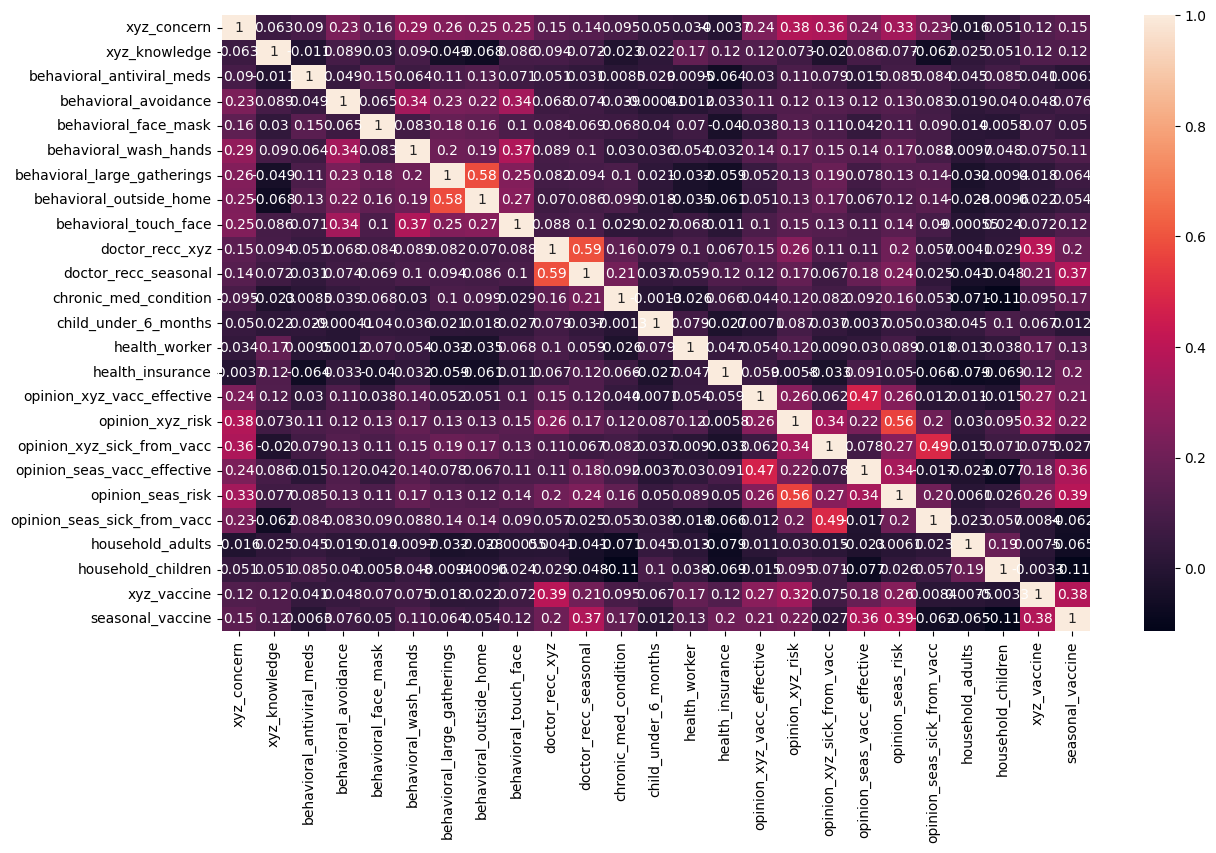

In [10]:
plt.figure(figsize=(14, 8)) 
sns.heatmap(df.corr(),annot=True)


In [11]:
df.isnull().sum()

xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [12]:
float_columns = ['behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_touch_face',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       "marital_status","rent_or_own","household_adults","household_children"]


from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='most_frequent')
df[float_columns] = num_imputer.fit_transform(df[float_columns])
testing[float_columns] = num_imputer.fit_transform(testing[float_columns])

In [13]:
df.isnull().sum()

xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face              0
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                     0
r

In [14]:
#most frequent value
df.xyz_knowledge.fillna(1.0,inplace=True)
testing.xyz_knowledge.fillna(1.0,inplace=True)

In [15]:
df.xyz_concern.fillna(2.0,inplace=True)
testing.xyz_concern.fillna(2.0,inplace=True)

In [16]:
df.behavioral_large_gatherings.fillna(0.0,inplace=True)
testing.behavioral_large_gatherings.fillna(0.0,inplace=True)

In [17]:
# Check if 'behavioral_outside_home' column is null
mask_null = df['behavioral_outside_home'].isnull()

# Apply the conditions
df.loc[mask_null & (df['behavioral_large_gatherings'] == 0.0), 'behavioral_outside_home'] = 0.0
df.loc[mask_null & (df['behavioral_large_gatherings'] != 0.0), 'behavioral_outside_home'] = 1.0

mask_null = testing['behavioral_outside_home'].isnull()
testing.loc[mask_null & (testing['behavioral_large_gatherings'] == 0.0), 'behavioral_outside_home'] = 0.0
testing.loc[mask_null & (testing['behavioral_large_gatherings'] != 0.0), 'behavioral_outside_home'] = 1.0

In [18]:
df.isnull().sum()

xyz_concern                        0
xyz_knowledge                      0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                     0
r

C:\Users\anuj\AppData\Local\Temp\ipykernel_16892\1349914871.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

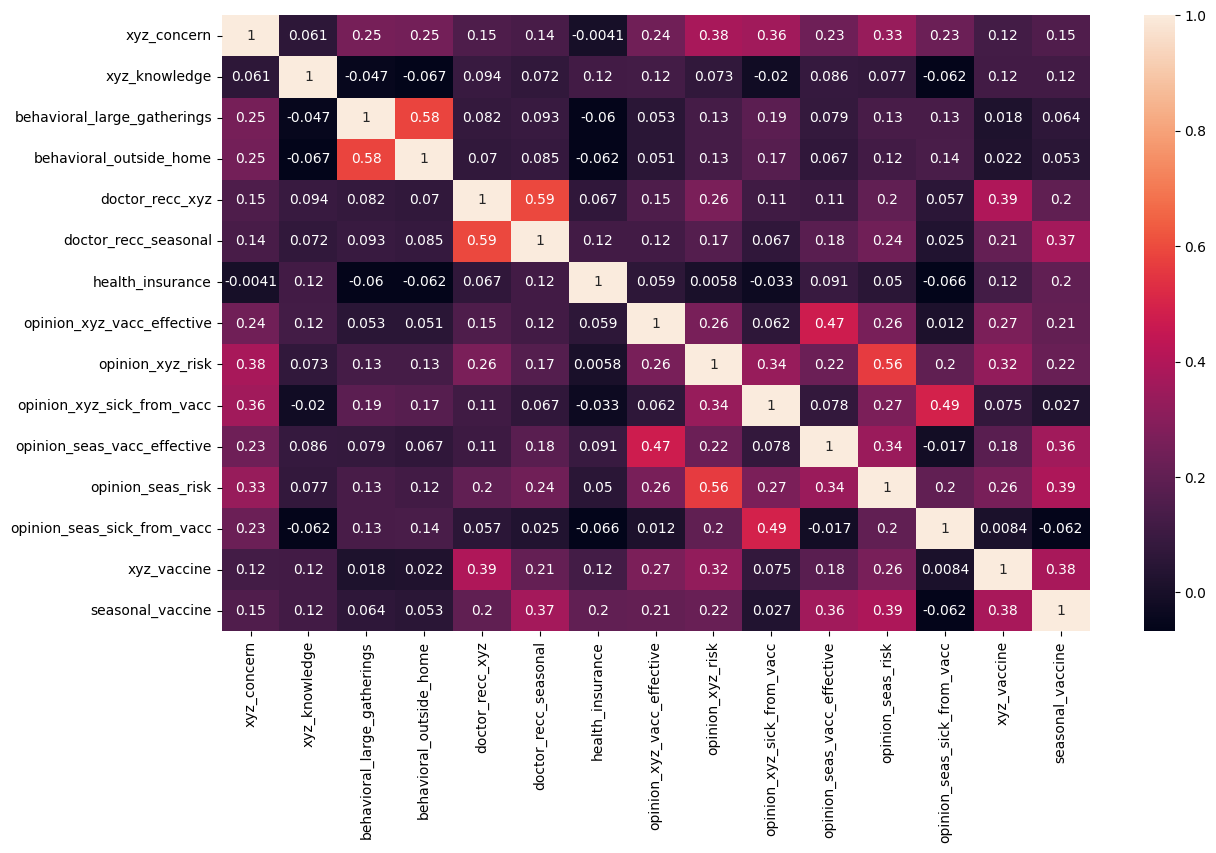

In [19]:
plt.figure(figsize=(14, 8)) 
sns.heatmap(df.corr(),annot=True)


In [20]:
df.doctor_recc_xyz.fillna(0.0,inplace=True)

testing.doctor_recc_xyz.fillna(0.0,inplace=True)

In [21]:
# Check if 'behavioral_outside_home' column is null
mask_null = df['doctor_recc_seasonal'].isnull()

# Apply the conditions
df.loc[mask_null & (df['doctor_recc_xyz'] == 0.0), 'doctor_recc_seasonal'] = 0.0
df.loc[mask_null & (df['doctor_recc_xyz'] != 0.0), 'doctor_recc_seasonal'] = 1.0

# Check if 'behavioral_outside_home' column is null
mask_null = testing['doctor_recc_seasonal'].isnull()

# Apply the conditions
testing.loc[mask_null & (testing['doctor_recc_xyz'] == 0.0), 'doctor_recc_seasonal'] = 0.0
testing.loc[mask_null & (testing['doctor_recc_xyz'] != 0.0), 'doctor_recc_seasonal'] = 1.0

In [22]:
df.isnull().sum()

xyz_concern                        0
xyz_knowledge                      0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_xyz                    0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                     0
r

C:\Users\anuj\AppData\Local\Temp\ipykernel_16892\1349914871.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

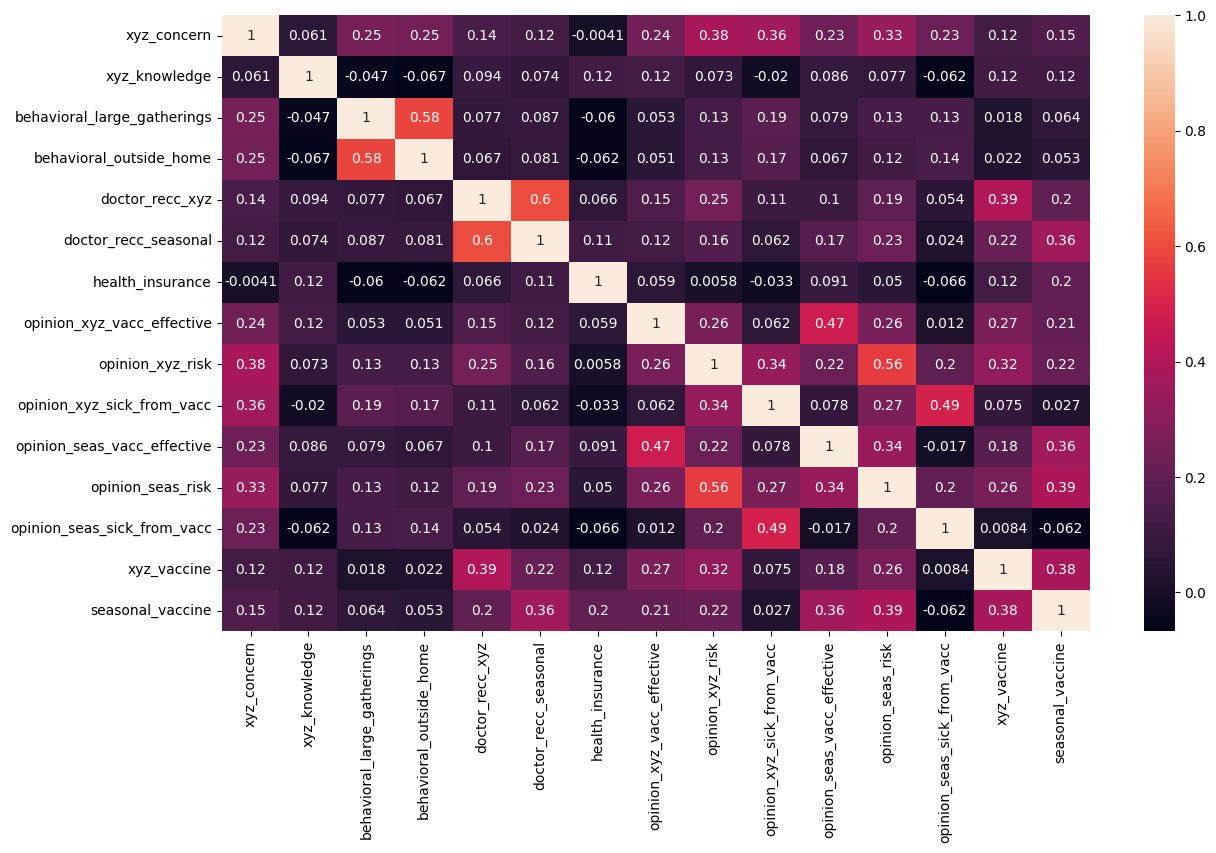

In [23]:
plt.figure(figsize=(14, 8)) 
sns.heatmap(df.corr(),annot=True)


In [24]:
df.opinion_xyz_vacc_effective.fillna(4.0,inplace=True)
mask_null = df['opinion_seas_vacc_effective'].isnull()

# Apply the conditions
df.loc[mask_null & (df['opinion_xyz_vacc_effective'] == 5.0), 'opinion_seas_vacc_effective'] = 5.0
df.loc[mask_null & (df['opinion_xyz_vacc_effective'] == 3.0), 'opinion_seas_vacc_effective'] = 3.0
df.loc[mask_null & (df['opinion_xyz_vacc_effective'] == 4.0), 'opinion_seas_vacc_effective'] = 4.0
df.loc[mask_null & (df['opinion_xyz_vacc_effective'] == 2.0), 'opinion_seas_vacc_effective'] = 2.0
df.loc[mask_null & (df['opinion_xyz_vacc_effective'] == 1.0), 'opinion_seas_vacc_effective'] = 1.0

testing.opinion_xyz_vacc_effective.fillna(4.0,inplace=True)
mask_null = testing['opinion_seas_vacc_effective'].isnull()

# Apply the conditions
testing.loc[mask_null & (testing['opinion_xyz_vacc_effective'] == 5.0), 'opinion_seas_vacc_effective'] = 5.0
testing.loc[mask_null & (testing['opinion_xyz_vacc_effective'] == 3.0), 'opinion_seas_vacc_effective'] = 3.0
testing.loc[mask_null & (testing['opinion_xyz_vacc_effective'] == 4.0), 'opinion_seas_vacc_effective'] = 4.0
testing.loc[mask_null & (testing['opinion_xyz_vacc_effective'] == 2.0), 'opinion_seas_vacc_effective'] = 2.0
testing.loc[mask_null & (testing['opinion_xyz_vacc_effective'] == 1.0), 'opinion_seas_vacc_effective'] = 1.0

In [25]:
df.opinion_xyz_risk.fillna(2.0,inplace=True)
mask_null = df['opinion_seas_risk'].isnull()

# Apply the conditions
df.loc[mask_null & (df['opinion_xyz_risk'] == 5.0), 'opinion_seas_risk'] = 5.0
df.loc[mask_null & (df['opinion_xyz_risk'] == 3.0), 'opinion_seas_risk'] = 3.0
df.loc[mask_null & (df['opinion_xyz_risk'] == 4.0), 'opinion_seas_risk'] = 4.0
df.loc[mask_null & (df['opinion_xyz_risk'] == 2.0), 'opinion_seas_risk'] = 2.0
df.loc[mask_null & (df['opinion_xyz_risk'] == 1.0), 'opinion_seas_risk'] = 1.0

testing.opinion_xyz_risk.fillna(2.0,inplace=True)
mask_null = testing['opinion_seas_risk'].isnull()

# Apply the conditions
testing.loc[mask_null & (testing['opinion_xyz_risk'] == 5.0), 'opinion_seas_risk'] = 5.0
testing.loc[mask_null & (testing['opinion_xyz_risk'] == 3.0), 'opinion_seas_risk'] = 3.0
testing.loc[mask_null & (testing['opinion_xyz_risk'] == 4.0), 'opinion_seas_risk'] = 4.0
testing.loc[mask_null & (testing['opinion_xyz_risk'] == 2.0), 'opinion_seas_risk'] = 2.0
testing.loc[mask_null & (testing['opinion_xyz_risk'] == 1.0), 'opinion_seas_risk'] = 1.0

In [26]:
df.opinion_xyz_sick_from_vacc.fillna(1.0,inplace=True)
mask_null = df['opinion_seas_sick_from_vacc'].isnull()

# Apply the conditions
df.loc[mask_null & (df['opinion_xyz_sick_from_vacc'] == 5.0), 'opinion_seas_sick_from_vacc'] = 5.0
df.loc[mask_null & (df['opinion_xyz_sick_from_vacc'] == 3.0), 'opinion_seas_sick_from_vacc'] = 3.0
df.loc[mask_null & (df['opinion_xyz_sick_from_vacc'] == 4.0), 'opinion_seas_sick_from_vacc'] = 4.0
df.loc[mask_null & (df['opinion_xyz_sick_from_vacc'] == 2.0), 'opinion_seas_sick_from_vacc'] = 2.0
df.loc[mask_null & (df['opinion_xyz_sick_from_vacc'] == 1.0), 'opinion_seas_sick_from_vacc'] = 1.0

testing.opinion_xyz_sick_from_vacc.fillna(1.0,inplace=True)
mask_null = testing['opinion_seas_sick_from_vacc'].isnull()

# Apply the conditions
testing.loc[mask_null & (testing['opinion_xyz_sick_from_vacc'] == 5.0), 'opinion_seas_sick_from_vacc'] = 5.0
testing.loc[mask_null & (testing['opinion_xyz_sick_from_vacc'] == 3.0), 'opinion_seas_sick_from_vacc'] = 3.0
testing.loc[mask_null & (testing['opinion_xyz_sick_from_vacc'] == 4.0), 'opinion_seas_sick_from_vacc'] = 4.0
testing.loc[mask_null & (testing['opinion_xyz_sick_from_vacc'] == 2.0), 'opinion_seas_sick_from_vacc'] = 2.0
testing.loc[mask_null & (testing['opinion_xyz_sick_from_vacc'] == 1.0), 'opinion_seas_sick_from_vacc'] = 1.0

In [27]:
df.isnull().sum()

xyz_concern                        0
xyz_knowledge                      0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_xyz                    0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance               12274
opinion_xyz_vacc_effective         0
opinion_xyz_risk                   0
opinion_xyz_sick_from_vacc         0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                     0
r

In [28]:
testing.isnull().sum()

xyz_concern                        0
xyz_knowledge                      0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_xyz                    0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance               12228
opinion_xyz_vacc_effective         0
opinion_xyz_risk                   0
opinion_xyz_sick_from_vacc         0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
marital_status                     0
r

C:\Users\anuj\AppData\Local\Temp\ipykernel_16892\1349914871.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

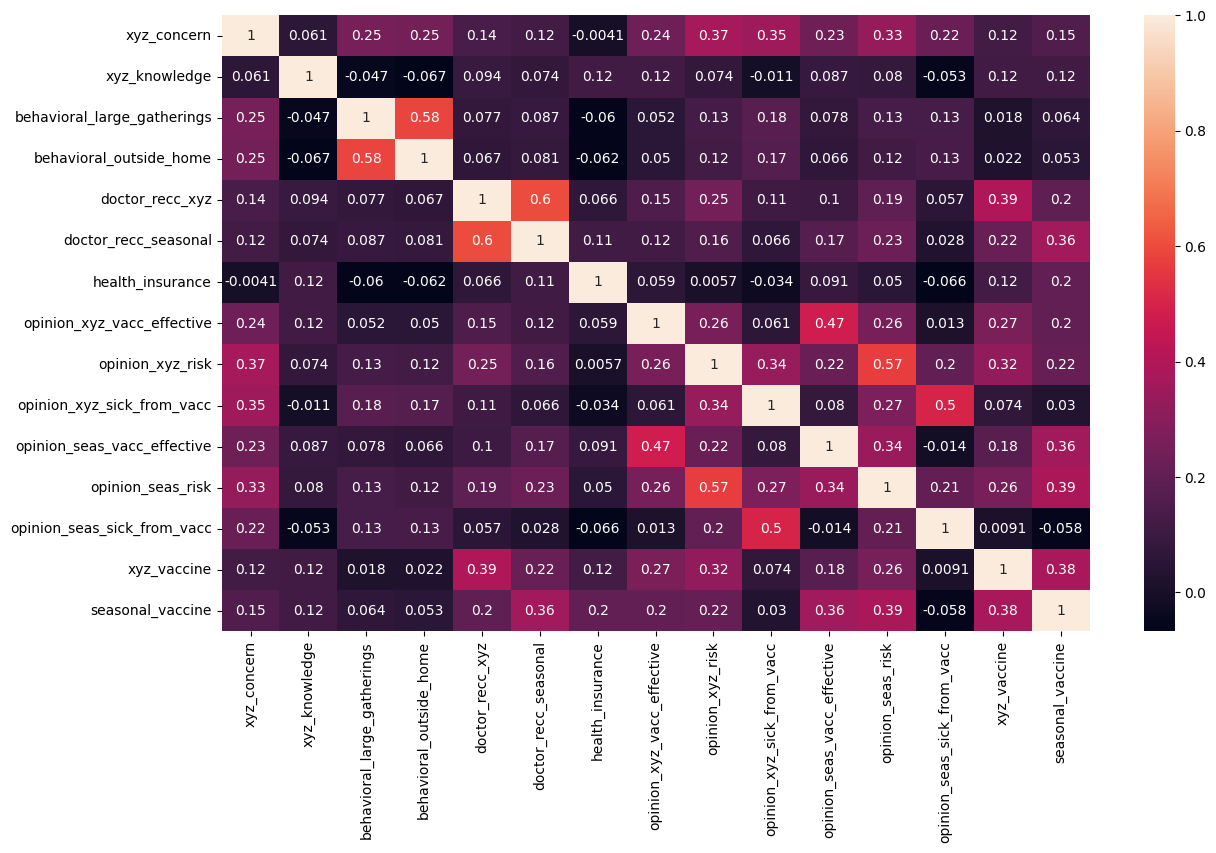

In [29]:
plt.figure(figsize=(14, 8)) 
sns.heatmap(df.corr(),annot=True)


In [30]:
df.isnull().sum()

xyz_concern                        0
xyz_knowledge                      0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_xyz                    0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance               12274
opinion_xyz_vacc_effective         0
opinion_xyz_risk                   0
opinion_xyz_sick_from_vacc         0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                     0
r

In [31]:
nan_col = ['education', 'income_poverty', 'employment_status']
nan_col

['education', 'income_poverty', 'employment_status']

In [32]:
for i in nan_col:
    df[i].fillna("Missing",inplace=True)
    testing[i].fillna("Missing",inplace=True)
    
df.health_insurance.fillna(2.0,inplace=True)
testing.health_insurance.fillna(2.0,inplace=True)

In [33]:
df.isnull().sum()

xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  26707 non-null  float64
 1   xyz_knowledge                26707 non-null  float64
 2   behavioral_antiviral_meds    26707 non-null  object 
 3   behavioral_avoidance         26707 non-null  object 
 4   behavioral_face_mask         26707 non-null  object 
 5   behavioral_wash_hands        26707 non-null  object 
 6   behavioral_large_gatherings  26707 non-null  float64
 7   behavioral_outside_home      26707 non-null  float64
 8   behavioral_touch_face        26707 non-null  object 
 9   doctor_recc_xyz              26707 non-null  float64
 10  doctor_recc_seasonal         26707 non-null  float64
 11  chronic_med_condition        26707 non-null  object 
 12  child_under_6_months         26707 non-null  object 
 13  health_worker   

In [35]:
df.columns

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'xyz_vaccine',
       'seasonal_vaccine'],
      dtype='object')

In [36]:
cols = ['behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands','behavioral_touch_face','chronic_med_condition', 'child_under_6_months', 'health_worker','household_adults', 'household_children']

In [37]:
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
testing[cols] = testing[cols].apply(pd.to_numeric, errors='coerce')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  26707 non-null  float64
 1   xyz_knowledge                26707 non-null  float64
 2   behavioral_antiviral_meds    26707 non-null  float64
 3   behavioral_avoidance         26707 non-null  float64
 4   behavioral_face_mask         26707 non-null  float64
 5   behavioral_wash_hands        26707 non-null  float64
 6   behavioral_large_gatherings  26707 non-null  float64
 7   behavioral_outside_home      26707 non-null  float64
 8   behavioral_touch_face        26707 non-null  float64
 9   doctor_recc_xyz              26707 non-null  float64
 10  doctor_recc_seasonal         26707 non-null  float64
 11  chronic_med_condition        26707 non-null  float64
 12  child_under_6_months         26707 non-null  float64
 13  health_worker   

In [39]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  26708 non-null  float64
 1   xyz_knowledge                26708 non-null  float64
 2   behavioral_antiviral_meds    26708 non-null  float64
 3   behavioral_avoidance         26708 non-null  float64
 4   behavioral_face_mask         26708 non-null  float64
 5   behavioral_wash_hands        26708 non-null  float64
 6   behavioral_large_gatherings  26708 non-null  float64
 7   behavioral_outside_home      26708 non-null  float64
 8   behavioral_touch_face        26708 non-null  float64
 9   doctor_recc_xyz              26708 non-null  float64
 10  doctor_recc_seasonal         26708 non-null  float64
 11  chronic_med_condition        26708 non-null  float64
 12  child_under_6_months         26708 non-null  float64
 13  health_worker   

C:\Users\anuj\AppData\Local\Temp\ipykernel_16892\2959282030.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

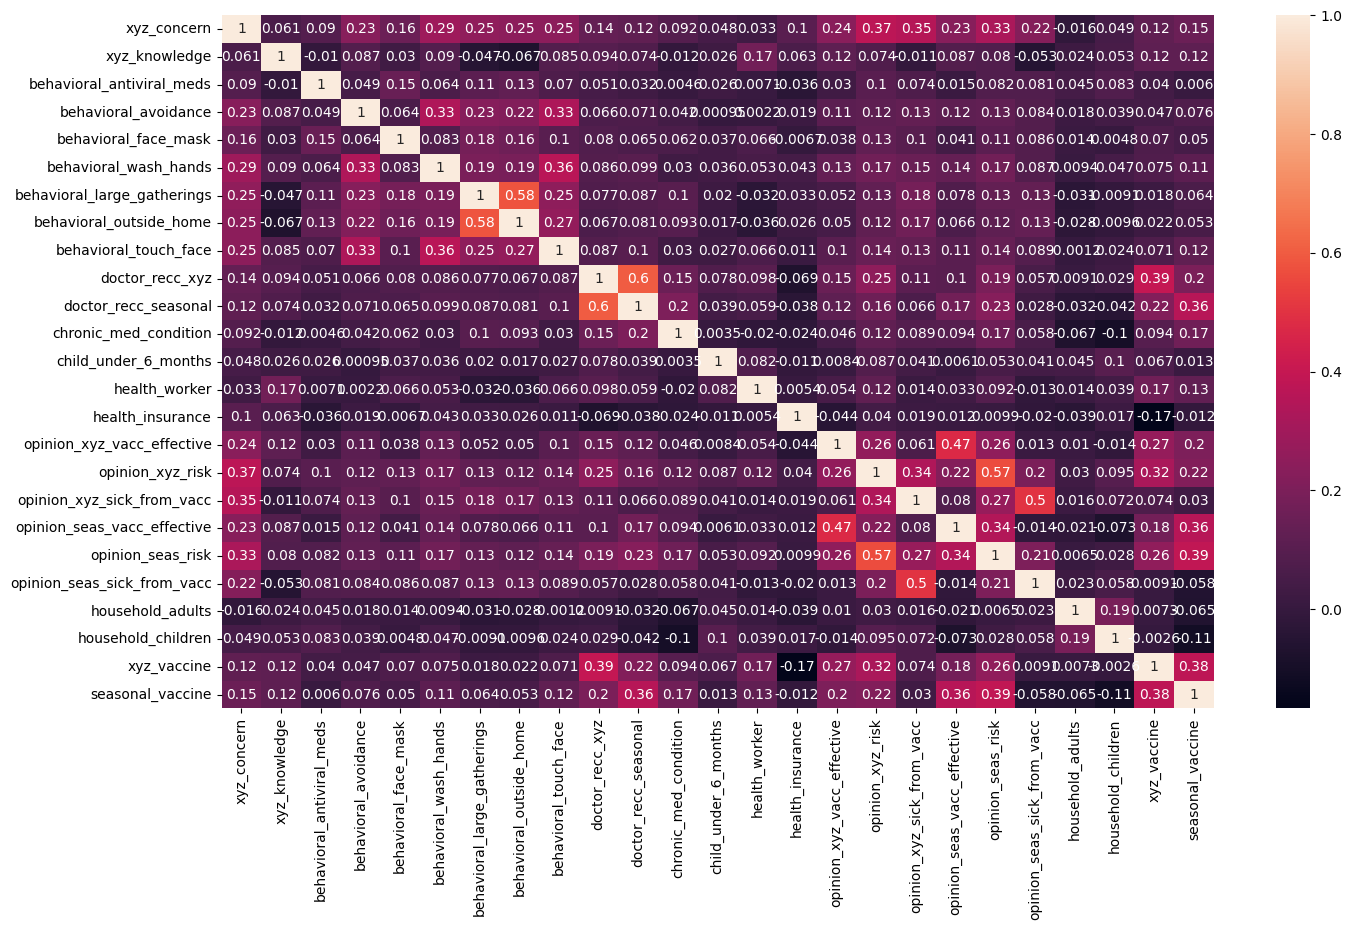

In [40]:
plt.figure(figsize=(16, 9)) 
sns.heatmap(df.corr(),annot=True)

In [41]:
filled_data = df.copy()
filled_data.to_csv("filled_data.csv",index=False)

In [42]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()

In [43]:
label_encoder = LabelEncoder()

# Apply LabelEncoder to each specified column
for col in object_columns:
    df[col] = label_encoder.fit_transform(df[col])
    testing[col] = label_encoder.transform(testing[col])

In [44]:
df.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,xyz_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,3,1,3,0,2,1,0,2,8,2,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,1,0,3,1,2,1,1,0,1,0,0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,1.0,1.0,4.0,1.0,2.0,0,2,3,1,0,1,0,0,9,0,2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,5.0,5.0,4.0,1.0,4,0,3,0,2,1,1,2,5,1,0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,2.0,3.0,1.0,4.0,2,4,3,0,0,0,0,0,9,0,1.0,0.0,0,0


In [45]:
testing.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1,2,1,0,1,1,1,0,7,0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,0,0,3,1,2,1,1,0,1,2,3.0,0.0
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,3,2,3,1,1,0,0,0,5,2,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,4,0,3,0,0,0,0,2,5,0,1.0,0.0
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,1,0,0,0,0,1,0,0,6,2,0.0,1.0


In [46]:
df.to_csv("filled_df_encoded.csv",index=False)

In [47]:
pd.read_csv("filled_data.csv")

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,xyz_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,Missing,Not Married,Own,Missing,lzgpxyit,"MSA, Not Principle City",0.0,0.0,0,1
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,0,0


In [48]:
testing.to_csv("testing_encoded.csv")